<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/DS_HealthCare_Final_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
data= pd.read_excel('/content/drive/MyDrive/Tanjila_mam/DS-Healthcare_version_2.xlsx')
result = {}
target = 'Type'

In [3]:
data[target].value_counts()

ischemic      581219
healthy       267360
arrhythmic     40238
Name: Type, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

data[target]=encoder.fit_transform(data[target])

In [5]:
X= data.loc[:,data.columns != target]
y = data[target]

In [6]:
def fun_split(X,Y,test_size,feature):

    f=Y.value_counts()
    rows=X.shape[0]
    talika=[]
    count=0
    for i in f:
        talika.append(i)
    train_size=1-test_size
    start=0

    switch=False

    for i in talika :

        train=start+int(i*train_size)
        f= X[feature][train]
        count1=0
        count2=0
        index1=train
        index2=train+1
        end=start+i-1

        while X[feature][index1]==f:
            if index1<start:
                break
            index1-=1
            count1+=1


        while X[feature][index2]==f:
            if index2>end:
                break
            index2+=1
            count2+=1

        if count1>=count2:
            train+=count2
        else:
            train-=count1


        if switch == False:
            X_train= X[start:train+1]
            X_test= X[train+1:end]
            Y_train = Y[start:train+1]
            Y_test = Y[train+1:end]
            switch=True

        else:
            X_train=pd.concat([X_train, X[start:train+1]], ignore_index=True)
            X_test=pd.concat([X_test, X[train+1:end+1]], ignore_index=True)
            Y_train=pd.concat([Y_train, Y[start:train+1]], ignore_index=True)
            Y_test=pd.concat([Y_test, Y[train+1:end+1]], ignore_index=True)

        start=start+i

    print('Train Percentage:',X_train.shape[0]/rows)

    return X_train,X_test,Y_train,Y_test

In [7]:
 X_train, X_test, y_train, y_test = fun_split(X,y, test_size=0.2, feature= 'Subject')

Train Percentage: 0.8002839729663137


In [8]:
X_train= X_train.loc[:,X_train.columns != 'Subject']
X_train= X_train.loc[:,X_train.columns != 'Time']
X_train= X_train.loc[:,X_train.columns != 'Cycle']

X_test= X_test.loc[:,X_test.columns != 'Subject']
X_test= X_test.loc[:,X_test.columns != 'Time']
X_test= X_test.loc[:,X_test.columns != 'Cycle']

#GradientBoost

In [9]:

from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=1,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[   902    821   5836]
 [  1005  40958  11172]
 [   448     13 116355]]
              precision    recall  f1-score   support

           0       0.38      0.12      0.18      7559
           1       0.98      0.77      0.86     53135
           2       0.87      1.00      0.93    116816

    accuracy                           0.89    177510
   macro avg       0.75      0.63      0.66    177510
weighted avg       0.88      0.89      0.88    177510

Accurecy:  0.8913018984845924


#RandomForest

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=2,max_depth=8,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[   693    963   5903]
 [  5235  32101  15799]
 [  1016     57 115743]]
              precision    recall  f1-score   support

           0       0.10      0.09      0.10      7559
           1       0.97      0.60      0.74     53135
           2       0.84      0.99      0.91    116816

    accuracy                           0.84    177510
   macro avg       0.64      0.56      0.58    177510
weighted avg       0.85      0.84      0.83    177510

Accurecy:  0.8367810264210467


#XGBoost

In [11]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=1,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[  1554    896   5109]
 [  2382  40560  10193]
 [   987     15 115814]]
              precision    recall  f1-score   support

           0       0.32      0.21      0.25      7559
           1       0.98      0.76      0.86     53135
           2       0.88      0.99      0.93    116816

    accuracy                           0.89    177510
   macro avg       0.73      0.65      0.68    177510
weighted avg       0.89      0.89      0.88    177510

Accurecy:  0.8896850881640471
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=Non

#Histogram-Based Gradient Boosting

In [13]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

hisgradBoost_max_depth = HistGradientBoostingClassifier(max_depth=1,random_state=0)
hisgradBoost_max_depth.fit(X_train, y_train)
y_pred = hisgradBoost_max_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(hisgradBoost_max_depth,5,'HistGradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[  1177    899   5483]
 [  1560  42812   8763]
 [   865     17 115934]]
              precision    recall  f1-score   support

           0       0.33      0.16      0.21      7559
           1       0.98      0.81      0.88     53135
           2       0.89      0.99      0.94    116816

    accuracy                           0.90    177510
   macro avg       0.73      0.65      0.68    177510
weighted avg       0.89      0.90      0.89    177510

Accurecy:  0.9009238916117401


In [14]:

model = hisgradBoost_max_depth
model = xgb_depth
model = rf_all
model = gradBoost_depth



#Cross Validation

In [15]:
"""from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")"""

'from sklearn.model_selection import cross_val_score\n\nk=5\nfor i in result:\n  print(i[0]," -> Accuracy: ",result[i])\n  l=list(cross_val_score(i[0],X_new, y_new,cv=k))\n  avg=sum(l)/k\n  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")\n  print("--------------------------------------------------------------------------")'

#SHAP

In [16]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 34.7 MB/s eta 0:00:00


In [17]:
def SHAP_EXP(model,graph_feat,list_of_feat1,start_index,end_index):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test[start_index:end_index])
  features_names=list_of_feat1


  print("Global Explaination")
  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("Global Explaination")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("Local Explaination")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


Models:  GradientBoostingClassifier(max_depth=1, random_state=0)
Global Explaination


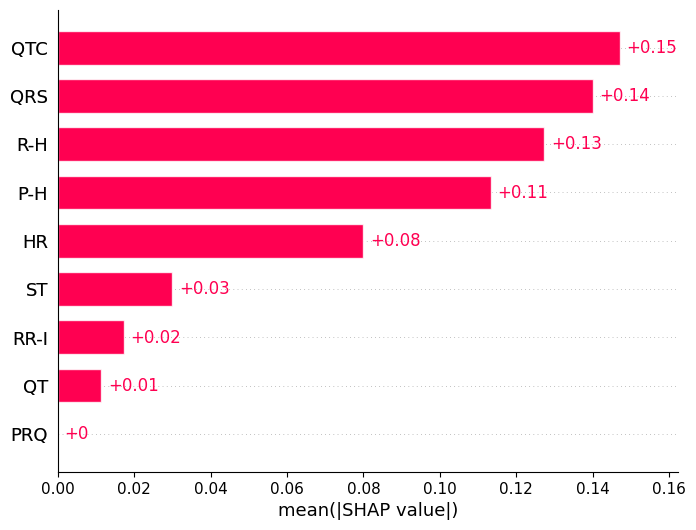

Global Explaination


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


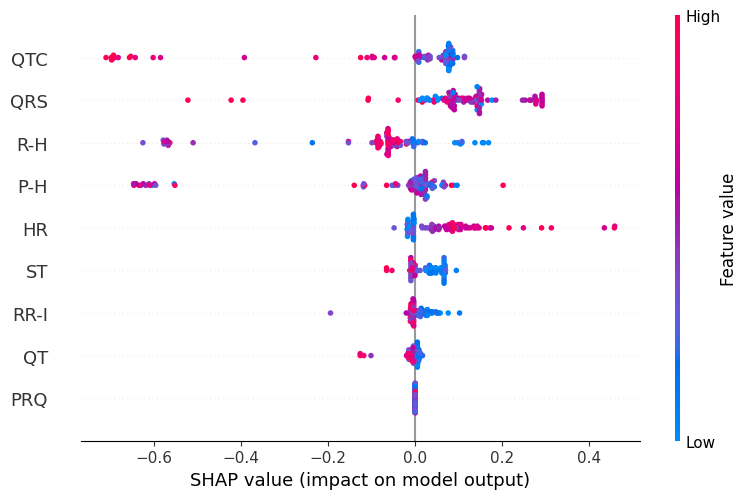

---------------------
Local Explaination


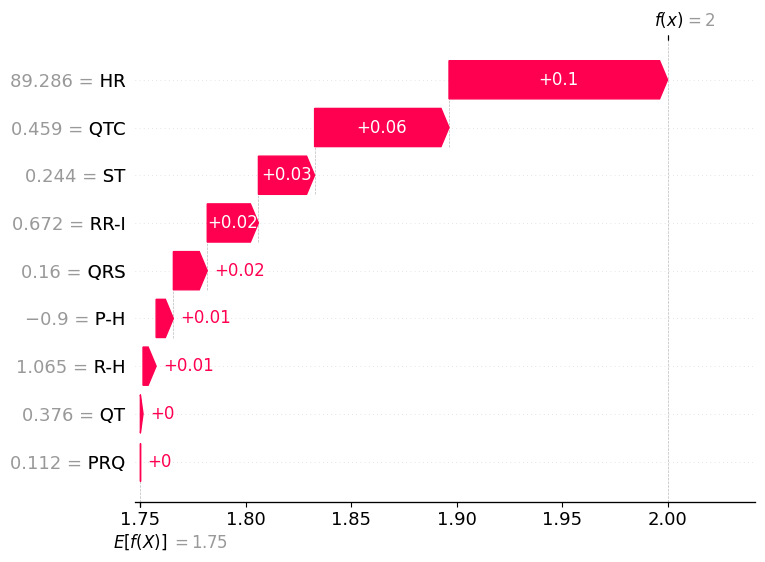

Local Explaination


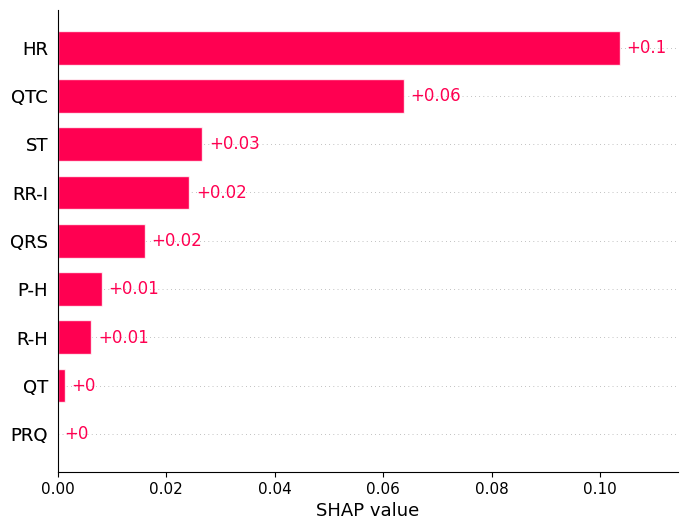

In [18]:
graph_feat={
    "max_display":30,
    "shap_values Index":10
}
start_index,end_index=0,100

SHAP_EXP(model,graph_feat,list(X_test.columns),start_index,end_index)

#Lime

In [19]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=c7f14acca8c8738f9cbaca83e33cd20616d03dc8c722fc72d8121822030f9ab1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [20]:
import lime
from lime import lime_tabular

def LIME_EXP(model,row,num_features,top_labels):

    if str(model)[:3] == "XGB":

      explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=list(list(X_train.columns)),
        class_names=['arrhythmic', 'healthy', 'ischemic'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row, :].values,
                                 model.predict_proba,
                                 num_features=num_features,
                                 top_labels=top_labels)




    else:
      explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X_train.columns),
        class_names=['arrhythmic', 'healthy', 'ischemic'],
        mode='classification'
        )

      exp = explainer.explain_instance(X_test.iloc[row],
                                      model.predict_proba,
                                      num_features=num_features,
                                      top_labels=top_labels)



    exp.show_in_notebook(show_table=True, show_all=True)



    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file(str(model)[0:10]+".html")

In [21]:
row = int(input("Enter the index of row to explain: "))

num_features,top_labels = 6,4
LIME_EXP(model,row,num_features,top_labels)

Enter the index of row to explain: 3


X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
